In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [48]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [49]:
df.shape

(1000, 16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [51]:
# profile = ProfileReport(df)
# profile.to_file("eda.html")

In [52]:
correlacao = df.select_dtypes(include='number').corr()
display(correlacao)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


Existem 91 células vazias (0.6%).

Não há valores duplicados.

Através da análise de correlação, percebe-se que o tempo de estudo e a saúde mental tem grande influência no resultado do exame.

In [53]:
df.dropna(inplace=True)

# Verificando outliers

In [54]:
colunas_numericas = df.select_dtypes(include='number')

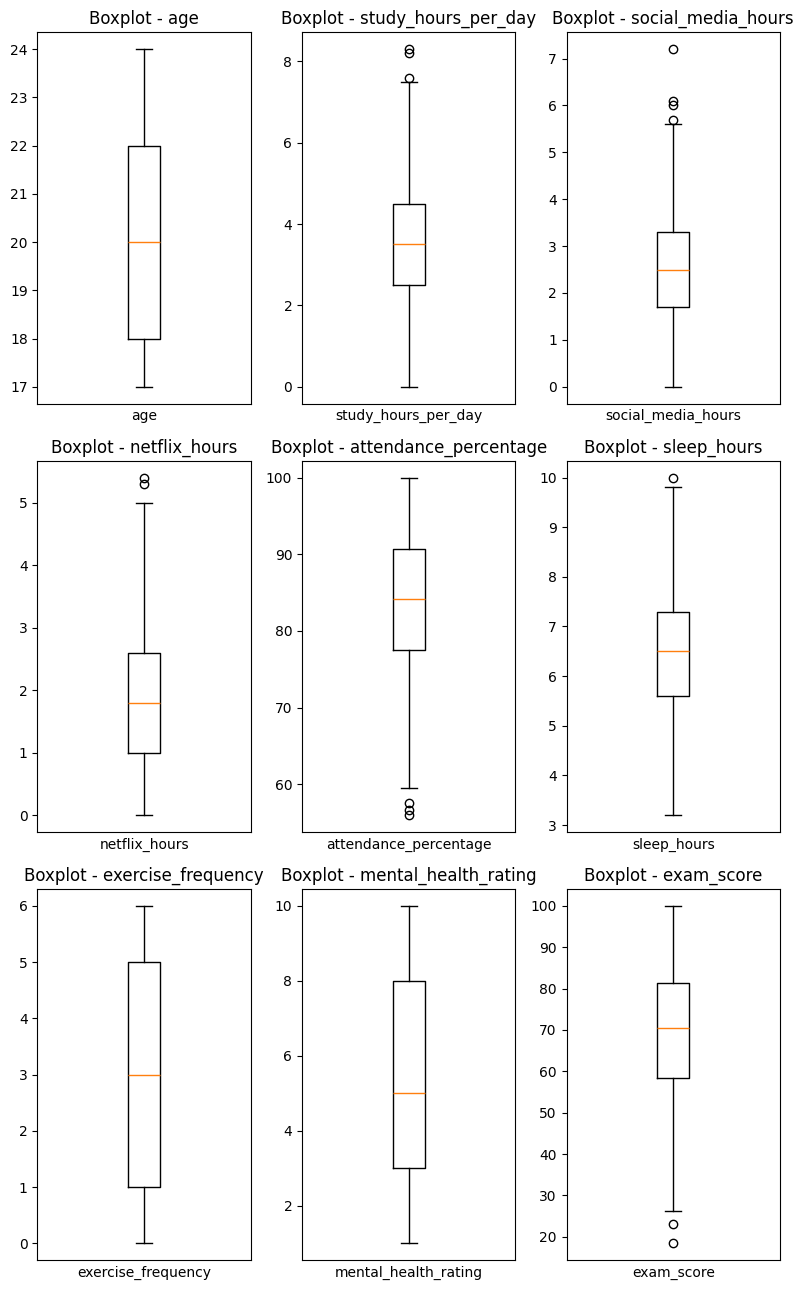

In [55]:
f,axes = plt.subplots(3,3,figsize=(8, 13))

axes = axes.flatten()

for i, feature in enumerate(colunas_numericas.columns):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Boxplot - {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

In [56]:
def detectar_outliers(df, coluna):
    # Calcular os quartis
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"Limite inferior: {limite_inferior:.2f}")
    print(f"Limite superior: {limite_superior:.2f}")

    # Encontrar os outliers (valores abaixo do limite inferior ou acima do limite superior)
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    # Mostrar os outliers
    print(outliers[coluna])

In [57]:
detectar_outliers(df, 'netflix_hours')

Limite inferior: -1.40
Limite superior: 5.00
556    5.4
822    5.3
Name: netflix_hours, dtype: float64


In [58]:
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inf) & (df[coluna] <= limite_sup)]

In [59]:
df_sem_outliers = remover_outliers(df, 'study_hours_per_day')
df_sem_outliers = remover_outliers(df_sem_outliers, 'social_media_hours')
df_sem_outliers = remover_outliers(df_sem_outliers, 'netflix_hours')
df_sem_outliers = remover_outliers(df_sem_outliers, 'attendance_percentage')
df_sem_outliers = remover_outliers(df_sem_outliers, 'sleep_hours')
df_sem_outliers = remover_outliers(df_sem_outliers, 'exam_score')

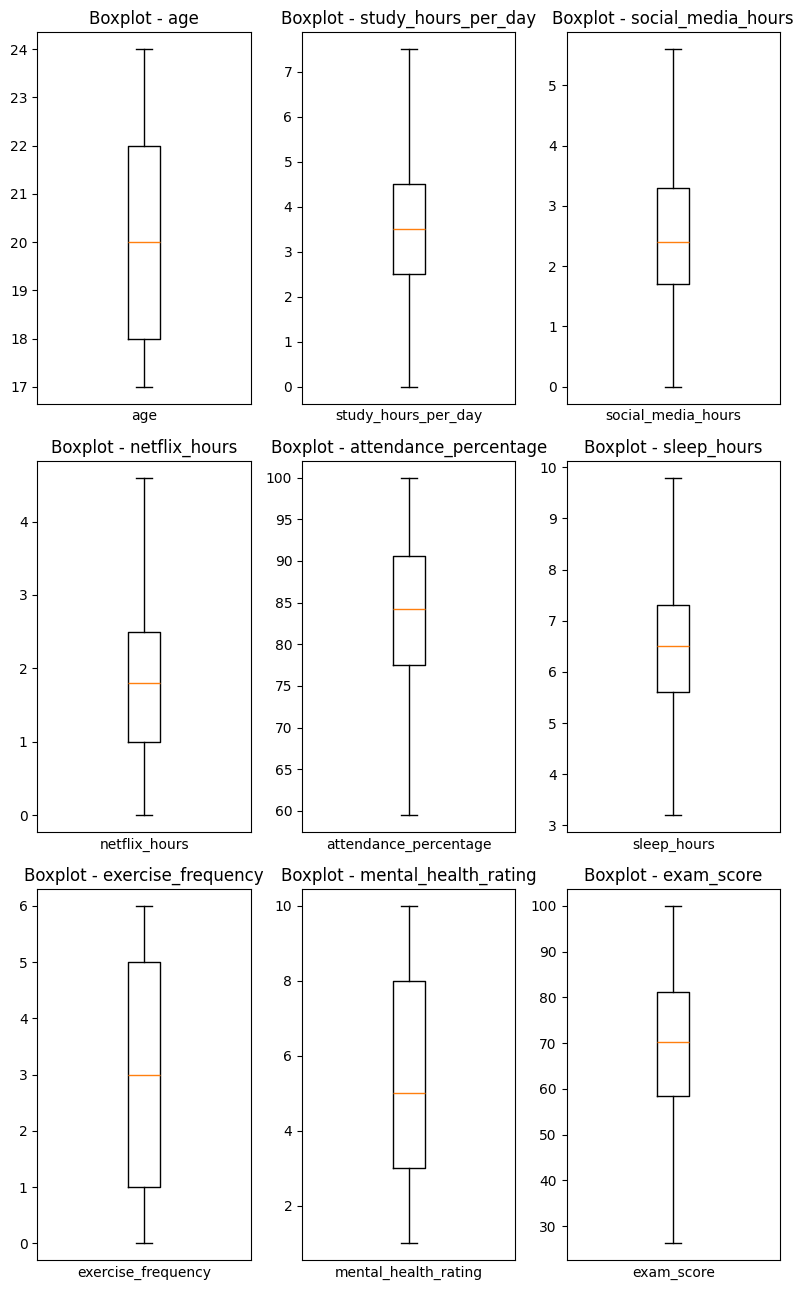

In [60]:
f,axes = plt.subplots(3, 3, figsize=(8, 13))

axes = axes.flatten()

for i, feature in enumerate(colunas_numericas.columns):
    axes[i].boxplot(df_sem_outliers[feature])
    axes[i].set_title(f'Boxplot - {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

# Influência da dieta no resultado do exame

In [61]:
print(df_sem_outliers['diet_quality'].value_counts())

diet_quality
Fair    392
Good    342
Poor    159
Name: count, dtype: int64


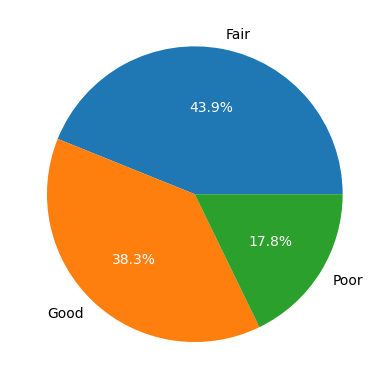

In [62]:
ax = df_sem_outliers['diet_quality'].value_counts().plot(kind='pie', autopct='%1.1f%%')
for text in ax.texts:
    if '%' in text.get_text():
        text.set_color('white')
plt.ylabel('');

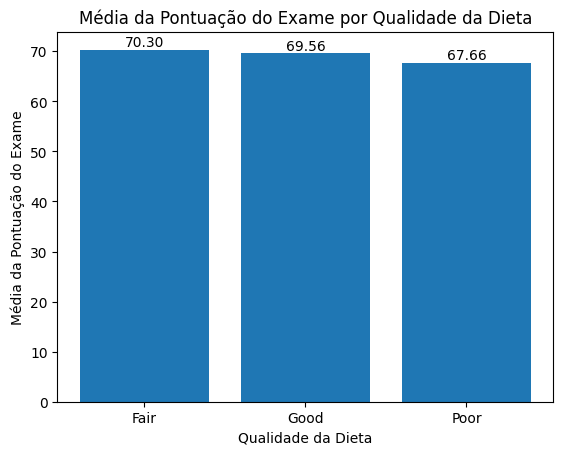

In [63]:
# Calculando a média da pontuação do exame por qualidade da dieta
diet_mean_scores = df_sem_outliers.groupby('diet_quality')['exam_score'].mean()

# Criando o gráfico de barras
plt.bar(diet_mean_scores.index, diet_mean_scores.values)

# Adicionando os rótulos e o título
plt.xlabel('Qualidade da Dieta')
plt.ylabel('Média da Pontuação do Exame')
plt.title('Média da Pontuação do Exame por Qualidade da Dieta')

# Adicionando os rótulos de dados em cada barra
for i, value in enumerate(diet_mean_scores.values):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

A dieta não parece afetar o resultado do exame.

# Influência do tempo de estudo por dia no resultado do exame

In [64]:
# Ordenando os dados em ordem decrescente pela coluna 'exam_score' e pegando os 5 menores
top_5_scores = df_sem_outliers.sort_values(by='exam_score').head(5)

# Exibindo as colunas 'study_hours_per_day' e 'exam_score'
display(top_5_scores[['study_hours_per_day', 'exam_score']])

,study_hours_per_day,exam_score
434,0.0,26.2
195,0.0,26.7
129,0.3,26.8
3,1.0,26.8
295,0.9,27.6


In [65]:
# Ordenando os dados em ordem decrescente pela coluna 'exam_score' e pegando os 5 maiores
top_5_scores = df_sem_outliers.sort_values(by='exam_score', ascending=False).head(5)

# Exibindo as colunas 'study_hours_per_day' e 'exam_score'
display(top_5_scores[['study_hours_per_day', 'exam_score']])

,study_hours_per_day,exam_score
381,6.2,100.0
517,5.8,100.0
306,6.0,100.0
721,5.9,100.0
293,7.4,100.0


Para ter um bom resultado no exame é necessário estudar no mínimo 5 horas por dia.

# Influência da saúde mental no resultado do exame

In [ ]:
# Ordenando os dados em ordem decrescente pela coluna 'exam_score' e pegando os 5 menores
top_5_scores = df_sem_outliers.sort_values(by='exam_score').head(5)

# Exibindo as colunas 'mental_health_rating' e 'exam_score'
display(top_5_scores[['mental_health_rating', 'exam_score']])

,mental_health_rating,exam_score
434,2,26.2
195,5,26.7
129,3,26.8
3,1,26.8
295,4,27.6


In [ ]:
# Ordenando os dados em ordem decrescente pela coluna 'exam_score' e pegando os 5 maiores
top_5_scores = df_sem_outliers.sort_values(by='exam_score', ascending=False).head(5)

# Exibindo as colunas 'mental_health_rating' e 'exam_score'
display(top_5_scores[['mental_health_rating', 'exam_score']])

,mental_health_rating,exam_score
381,10,100.0
517,6,100.0
306,9,100.0
721,8,100.0
293,10,100.0


As melhores notas vieram de pessoas com as maiores classificações de saúde mental.